This notebook is a comprehensive analysis of network intrusion detection using the cyberfeddefender_dataset.csv dataset. The goal is to develop and evaluate a classification model to identify network attacks.

## Load Dataset

Load the '/content/data/cyberfeddefender_dataset.csv' file into a pandas DataFrame.


In [29]:
import pandas as pd
df = pd.read_csv('/content/data/cyberfeddefender_dataset.csv')
print(df.head())

             Timestamp    Source_IP Destination_IP Protocol  Packet_Length  \
0  2024-10-23 12:00:00  192.168.0.1    192.168.0.1     ICMP           1155   
1  2024-10-23 12:00:01  192.168.0.7     172.16.0.5     ICMP           1776   
2  2024-10-23 12:00:02  192.168.0.7       10.0.0.3      UDP            627   
3  2024-10-23 12:00:03  192.168.0.7       10.0.0.3      UDP           1754   
4  2024-10-23 12:00:04  192.168.0.1       10.0.0.4      UDP           1326   

   Duration  Source_Port  Destination_Port  Bytes_Sent  Bytes_Received  ...  \
0      4.01           53                53         675             877  ...   
1      3.75           22                22         297            1062  ...   
2      4.24           80              8080         122             723  ...   
3      3.09          443               443        1626            1703  ...   
4      2.52           80               443        1851             771  ...   

  Avg_Packet_Size  Total_Fwd_Packets  Total_Bwd_Packets 

## Data Cleaning
Address missing values by identifying and imputing or removing them. Also, identify and remove any duplicate rows from the dataset.


In [24]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Timestamp             0
Source_IP             0
Destination_IP        0
Protocol              0
Packet_Length         0
Duration              0
Source_Port           0
Destination_Port      0
Bytes_Sent            0
Bytes_Received        0
Flags                 0
Flow_Packets/s        0
Flow_Bytes/s          0
Avg_Packet_Size       0
Total_Fwd_Packets     0
Total_Bwd_Packets     0
Fwd_Header_Length     0
Bwd_Header_Length     0
Sub_Flow_Fwd_Bytes    0
Sub_Flow_Bwd_Bytes    0
Inbound               0
Attack_Type           0
Label                 0
dtype: int64


In [25]:
print(f"Number of duplicate rows before removal: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


## Exploratory Data Analysis (EDA)

Perform an initial exploration of the dataset, including descriptive statistics, data types, and distribution of key variables. Generate relevant plots to visualize the data distribution. Ensure that legends are provided for all plots.


In [26]:
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

print("\nDescriptive statistics for categorical columns:")
print(df.describe(include='object'))

print("\nDataFrame information (data types and non-null counts):")
df.info()


Descriptive statistics for numerical columns:
       Packet_Length     Duration  Source_Port  Destination_Port   Bytes_Sent  \
count    1430.000000  1430.000000  1430.000000       1430.000000  1430.000000   
mean     1064.520280     2.586084  1673.184615       1848.512587  1015.900000   
std       572.437816     1.420248  3124.172914       3275.839849   569.400101   
min        64.000000     0.100000    22.000000         22.000000    65.000000   
25%       562.000000     1.360000    53.000000         53.000000   503.000000   
50%      1066.000000     2.605000    80.000000         80.000000  1019.000000   
75%      1539.000000     3.840000   443.000000        443.000000  1497.000000   
max      2046.000000     5.000000  8080.000000       8080.000000  2045.000000   

       Bytes_Received  Flow_Packets/s  Flow_Bytes/s  Avg_Packet_Size  \
count     1430.000000     1430.000000   1430.000000      1430.000000   
mean      1045.531469       24.793007   1070.640140       460.128671   
std    

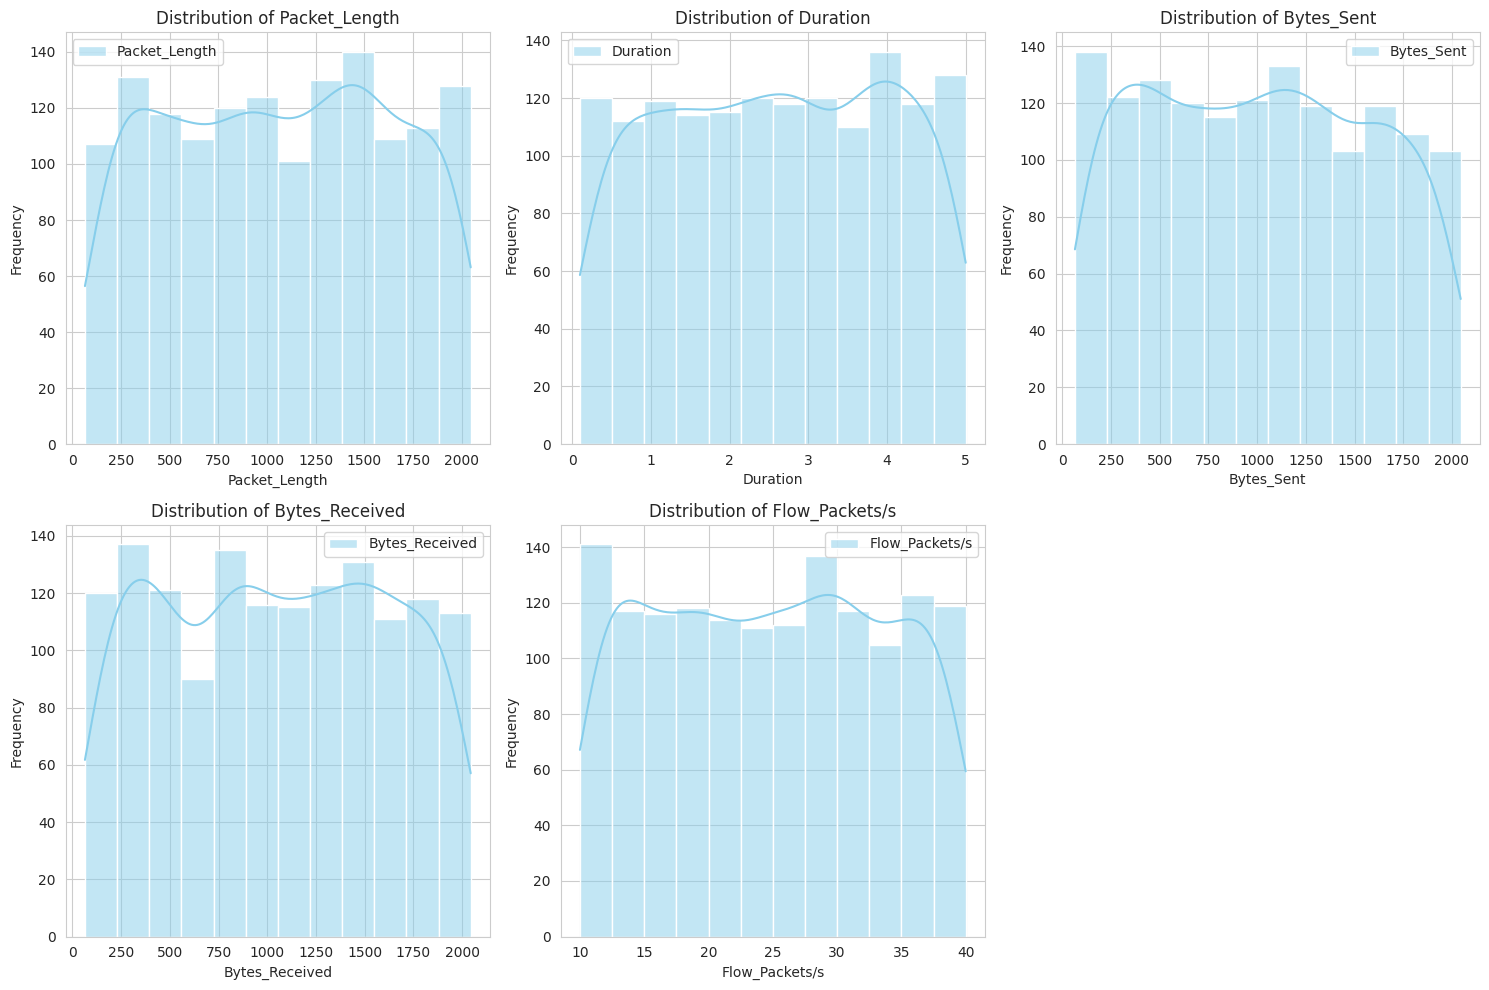

/tmp/ipython-input-3714440901.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-3714440901.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-3714440901.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


<Figure size 640x480 with 0 Axes>

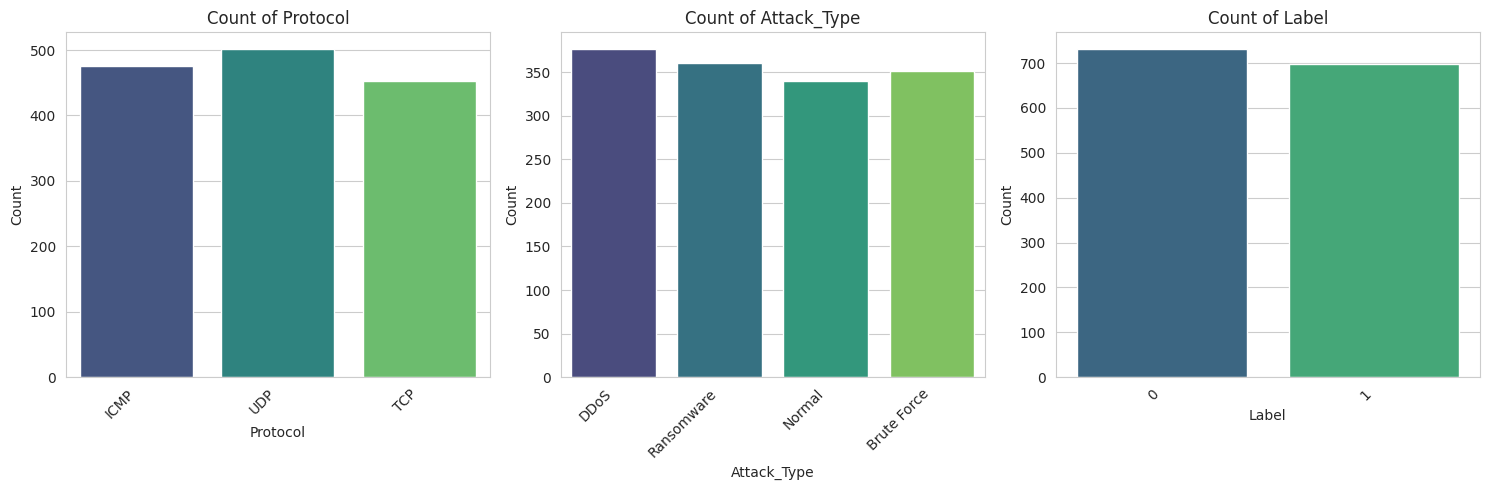

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# Numerical columns for distribution plots
numerical_cols = ['Packet_Length', 'Duration', 'Bytes_Sent', 'Bytes_Received', 'Flow_Packets/s']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, label=col, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('/content/images/distribution_plots.png')

# Categorical columns for count plots
categorical_cols = ['Protocol', 'Attack_Type', 'Label']

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('/content/images/count_plots.png')

In [31]:
## Outlier Detection
##Identify outliers using appropriate methods and visualizations, ensuring legends are provided for all plots.

/tmp/ipython-input-2461946818.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='viridis')
/tmp/ipython-input-2461946818.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='viridis')
/tmp/ipython-input-2461946818.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='viridis')
/tmp/ipython-input-2461946818.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

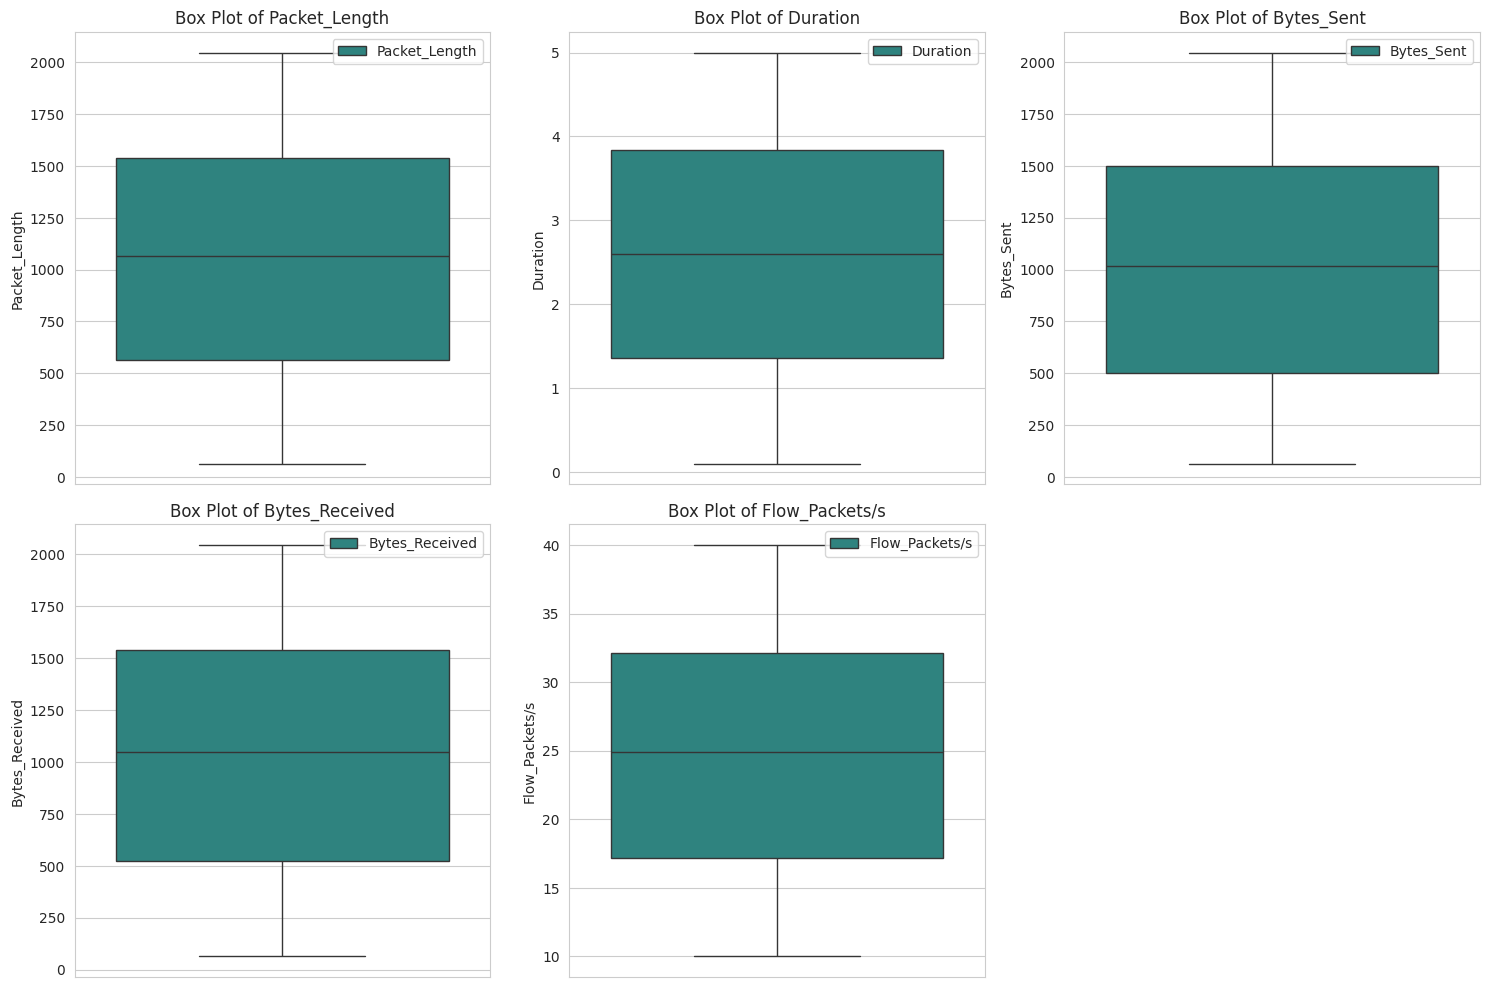

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_cols' is already defined from previous EDA step
# If not, it should be re-defined here, e.g.:
# numerical_cols = ['Packet_Length', 'Duration', 'Bytes_Sent', 'Bytes_Received', 'Flow_Packets/s']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], palette='viridis')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    # Add a dummy legend for consistency as boxplot itself doesn't have a direct legend for the box
    plt.legend([col], loc='upper right')
plt.tight_layout()
plt.show()
plt.savefig('/content/images/box_plots.png')


## Feature Engineering
Create new variables or transform existing ones to enhance the dataset for further analysis.

I will convert the 'Timestamp' column to a datetime object, which is a necessary step for extracting time-based features and enabling time-series analysis.



In [35]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print("Timestamp column converted to datetime:")
print(df['Timestamp'].head())

Timestamp column converted to datetime:
0   2024-10-23 12:00:00
1   2024-10-23 12:00:01
2   2024-10-23 12:00:02
3   2024-10-23 12:00:03
4   2024-10-23 12:00:04
Name: Timestamp, dtype: datetime64[ns]


Now that the 'Timestamp' column is in datetime format, I will extract additional time-based features such as 'Hour', 'DayOfWeek', 'Month', and 'Year'. These new features can provide valuable temporal insights for analysis.



In [36]:
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

print("New time-based features created:")
print(df[['Timestamp', 'Hour', 'DayOfWeek', 'Month', 'Year']].head())

New time-based features created:
            Timestamp  Hour  DayOfWeek  Month  Year
0 2024-10-23 12:00:00    12          2     10  2024
1 2024-10-23 12:00:01    12          2     10  2024
2 2024-10-23 12:00:02    12          2     10  2024
3 2024-10-23 12:00:03    12          2     10  2024
4 2024-10-23 12:00:04    12          2     10  2024



I will create a new feature, 'Total_Bytes_Transferred', by summing 'Bytes_Sent' and 'Bytes_Received'. This new feature will represent the total data volume in each flow, which can be an important indicator in network traffic analysis.



In [37]:
df['Total_Bytes_Transferred'] = df['Bytes_Sent'] + df['Bytes_Received']
print("New feature 'Total_Bytes_Transferred' created:")
print(df[['Bytes_Sent', 'Bytes_Received', 'Total_Bytes_Transferred']].head())

New feature 'Total_Bytes_Transferred' created:
   Bytes_Sent  Bytes_Received  Total_Bytes_Transferred
0         675             877                     1552
1         297            1062                     1359
2         122             723                      845
3        1626            1703                     3329
4        1851             771                     2622



I will create a new feature, 'Bytes_Ratio', by dividing 'Bytes_Sent' by 'Bytes_Received'. This ratio can highlight flows with asymmetric data transfer, which may be significant for detecting certain network anomalies or attack types.



In [38]:
df['Bytes_Ratio'] = df['Bytes_Sent'] / (df['Bytes_Received'] + 1) # Add 1 to avoid division by zero
print("New feature 'Bytes_Ratio' created:")
print(df[['Bytes_Sent', 'Bytes_Received', 'Bytes_Ratio']].head())

New feature 'Bytes_Ratio' created:
   Bytes_Sent  Bytes_Received  Bytes_Ratio
0         675             877     0.768793
1         297            1062     0.279398
2         122             723     0.168508
3        1626            1703     0.954225
4        1851             771     2.397668


## Data for Modeling

Preprocess the data for machine learning. This includes separating features (X) and target (y) ('Label' column), encoding categorical features, and splitting the dataset into training and testing sets.


In [39]:
X = df.drop(columns=['Label', 'Timestamp'])
y = df['Label']

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Features (X) head:
     Source_IP Destination_IP Protocol  Packet_Length  Duration  Source_Port  \
0  192.168.0.1    192.168.0.1     ICMP           1155      4.01           53   
1  192.168.0.7     172.16.0.5     ICMP           1776      3.75           22   
2  192.168.0.7       10.0.0.3      UDP            627      4.24           80   
3  192.168.0.7       10.0.0.3      UDP           1754      3.09          443   
4  192.168.0.1       10.0.0.4      UDP           1326      2.52           80   

   Destination_Port  Bytes_Sent  Bytes_Received Flags  ...  \
0                53         675             877   SYN  ...   
1                22         297            1062   ACK  ...   
2              8080         122             723   ACK  ...   
3               443        1626            1703   FIN  ...   
4               443        1851             771   PSH  ...   

   Sub_Flow_Fwd_Bytes  Sub_Flow_Bwd_Bytes  Inbound  Attack_Type  Hour  \
0                 697                1028        1    

In [40]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns
print(f"Identified categorical features: {list(categorical_features)}")

Identified categorical features: ['Source_IP', 'Destination_IP', 'Protocol', 'Flags', 'Attack_Type']


In [41]:
X = pd.get_dummies(X, columns=categorical_features, drop_first=False)
print("Features (X) after one-hot encoding:")
print(X.head())

Features (X) after one-hot encoding:
   Packet_Length  Duration  Source_Port  Destination_Port  Bytes_Sent  \
0           1155      4.01           53                53         675   
1           1776      3.75           22                22         297   
2            627      4.24           80              8080         122   
3           1754      3.09          443               443        1626   
4           1326      2.52           80               443        1851   

   Bytes_Received  Flow_Packets/s  Flow_Bytes/s  Avg_Packet_Size  \
0             877            37.9         583.2              512   
1            1062            37.8        1100.6             1024   
2             723            12.3         339.1              512   
3            1703            19.2        1913.5              256   
4             771            16.2         105.9             1024   

   Total_Fwd_Packets  ...  Protocol_TCP  Protocol_UDP  Flags_ACK  Flags_FIN  \
0                 21  ...         Fa

split the data into training and testing sets using `train_test_split` with a test size of 0.2, a `random_state` for reproducibility, and `stratify=y` to maintain the class distribution.



In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1144, 48)
Shape of X_test: (286, 48)
Shape of y_train: (1144,)
Shape of y_test: (286,)


## Develop Baseline Classification Model

Develop a baseline classification model (e.g., Logistic Regression or Decision Tree Classifier) using the training data. After training, make predictions on the test set.


In [43]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

print("Logistic Regression model trained and predictions made.")

Logistic Regression model trained and predictions made.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Increased max_iter to 5000 to attempt to resolve ConvergenceWarning
log_reg = LogisticRegression(random_state=42, max_iter=5000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

print("Logistic Regression model trained and predictions made.")

Logistic Regression model trained and predictions made.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features in X_train and X_test
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Instantiate the Logistic Regression model
# Increased max_iter and scaled data to attempt to resolve ConvergenceWarning
log_reg = LogisticRegression(random_state=42, max_iter=5000)

# Train the model on scaled data
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = log_reg.predict(X_test_scaled)

print("Numerical features scaled and Logistic Regression model retrained with scaled data.")

Numerical features scaled and Logistic Regression model retrained with scaled data.


## Evaluate Baseline Model and Visualize Results

Evaluate the baseline model using the selected evaluation metric. Generate a confusion matrix and, if applicable, an ROC curve to visualize the model's performance.


Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.47      0.48       146
           1       0.46      0.47      0.47       140

    accuracy                           0.47       286
   macro avg       0.47      0.47      0.47       286
weighted avg       0.47      0.47      0.47       286


ROC AUC Score: 0.47


<Figure size 800x600 with 0 Axes>

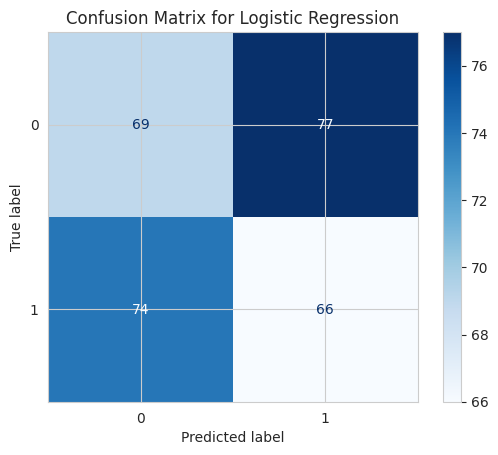

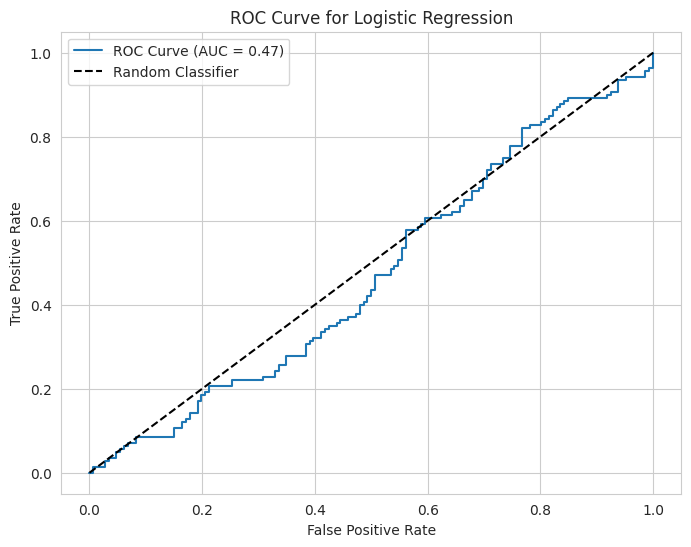

In [47]:
import os
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a directory named `/images` if it does not already exist
if not os.path.exists('/images'):
    os.makedirs('/images')

# 4. Print a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5. Calculate the predicted probabilities for the positive class
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# 6. Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)

# 7. Print the ROC AUC score
print(f"\nROC AUC Score: {roc_auc:.2f}")

# 8. Generate and display the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.savefig('/content/images/confusion_matrix.png')
plt.show()

# 9. Generate and display the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.savefig('/content/images/roc_curve.png')
plt.show()